# Load Data

In [ ]:
from google.colab import files
files.upload()

{}

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('LifeOwnershipData - NEW Sep 29.csv', encoding='latin1')
df.head(3)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10,19,24,39,52,53,54,61,71,76,81,86,91,96,101,119,120,139,150,163,164,170,171,176,181,190,195,196,200,209,211,214) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,respid,qd5,q8,q9,q16,q22,q30,PresenceOfSpousePartner,Q12,Q13,Q14,Q15,Q18,Q18a,Q18bPol1,Q18bPol2,Q18bPol3,Q18bPol4,Q18bPol5,Q18b2Pol1,Q18b2Pol2,Q18b2Pol3,Q18b2Pol4,Q18b2Pol5,Q18b3Pol1,Q18b3Pol2,Q18b3Pol3,Q18b3Pol4,Q18b3Pol5,GroupPol1,GroupPol2,GroupPol3,GroupPol4,GroupPol5,GroupPolDK1,GroupPolDK2,GroupPolDK3,GroupPolDK4,GroupPolDK5,...,q34_3,q34_4,q34_5,q34_6,q34_7,q34_8,q34_9,q34_10,q37,q38_1,q38_2,q38_3,q38_4,q38_5,q38_6,q38_7,q38_8,q38_9,q38_10,q38_11,q38_12,q38_13,q39_1,q39_2,q39_3,q39_4,q39_5,q39_6,q39_7,q39_8,q40_1,q40_2,q40_3,q40_4,q40_5,q40_6,q40_7,q40_8,q40_9,q41
0,1,18,"$75,000 - $99,999",2,Living with spouse/partner,No,Yes,No,Spouse/Partner,Male,67,Myself,"$25,000 to $34,999",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,No,No,No,No,No,No,No,No,Not Very Likely,Major reason,Major reason,Not at all a reason,Not at all a reason,Not at all a reason,Not at all a reason,Not at all a reason,Not at all a reason,Minor reason,Minor reason,Minor reason,Not at all a reason,Not at all a reason,No,No,Yes,No,Yes,No,No,No,More likely to buy,More likely to buy,No influence,No influence,No influence,More likely to buy,No influence,More likely to buy,No influence,Face-to-face with a financial professional
1,2,18,"$75,000 - $99,999",2,Living with spouse/partner,No,Yes,No,Spouse/Partner,Female,65,Wife/partner,"$35,000 to $49,999",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,No,No,No,No,No,No,No,No,Not Very Likely,Major reason,Major reason,Not at all a reason,Not at all a reason,Not at all a reason,Not at all a reason,Not at all a reason,Not at all a reason,Minor reason,Minor reason,Minor reason,Not at all a reason,Not at all a reason,No,No,Yes,No,Yes,No,No,No,More likely to buy,More likely to buy,No influence,No influence,No influence,More likely to buy,No influence,More likely to buy,No influence,Face-to-face with a financial professional
2,3,19,"$75,000 - $99,999",2,Living with spouse/partner,Yes,No,Yes,Spouse/Partner,Male,68,Myself,"$35,000 to $49,999",YES,1,Term life insurance,NaN,NaN,NaN,NaN,Basic life insurance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50000.0,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,...,No,No,No,No,No,No,No,No,Not Very Likely,Not at all a reason,Not at all a reason,Not at all a reason,Major reason,Minor reason,Not at all a reason,Minor reason,Minor reason,Not at all a reason,Not at all a reason,Minor reason,Not at all a reason,Not at all a reason,No,No,No,Yes,Yes,Yes,No,No,No influence,No influence,No influence,More likely to buy,No influence,No influence,No influence,No influence,No influence,Through the Internet


# Prepocessing

In [ ]:
#Drop Poll columns
df.drop([col for col in df.columns if 'Pol' in col], axis=1, inplace = True)
df.drop([col for col in df.columns if 'Curr' in col], axis=1, inplace = True)
df.drop([col for col in df.columns if 'Prior' in col], axis=1, inplace = True)
df.drop([col for col in df.columns if 'DK' in col], axis=1, inplace = True)

#drop assumption columns
df.drop([col for col in df.columns if 'q38' in col], axis=1, inplace = True)
df.drop([col for col in df.columns if 'q39' in col], axis=1, inplace = True)
df.drop([col for col in df.columns if 'q40' in col], axis=1, inplace = True)
df.drop([col for col in df.columns if 'q34' in col], axis=1, inplace = True)
df.drop([col for col in df.columns if 'q21' in col], axis=1, inplace = True)

df.drop(['q37','q1','q2','q3_1','q3_2','q3_3','q3_4'], axis=1, inplace=True)
         
#drop related to household columns 
#df.drop(['qd1','qd2','qd3'], axis=1,inplace = True)

#Drop redudant columns
df.drop(['Unnamed: 0','YearsReplacement','TotalLife','GrpAmtsUnknown','TotalIndLifeFaceAmt','TotalGroup','PersonalIncome4Cat','Q15','AdultChild','AdultGender'], axis=1,inplace = True)

#drop unuseful columns
df.drop(['qs2','qd9b'], axis=1,inplace = True)

#Drop columns that have some insights to analyse but not useful for building a model
df.drop(['q41'], axis=1, inplace=True)

#directly related with AnyLifePerson--insights
df.drop(['q16','q22','q30','Q18','Q18a'], axis=1, inplace=True)

#df.head()

In [ ]:
#combine employment, investment,  
df.loc[df.duplicated(subset='respid'),['qd4a']] = df.loc[df.duplicated(subset='respid')]['qd4b']
df.loc[df.duplicated(subset='respid'),['qd7a']] = df.loc[df.duplicated(subset='respid')]['qd7b']
df.loc[df.duplicated(subset='respid'),['qd4c']] = df.loc[df.duplicated(subset='respid')]['qd4d']

#drop redudant columns
df.drop(['qd4b','qd7b','qd4d'], axis=1,inplace = True)

#Select Subset

In [ ]:
df1 = df[~df['PersonalIncome5Cat'].isna()]

# Drop N/A and redudant columns

In [ ]:
df2 = df1.dropna(axis=1)

#variables dropped with na: 21 variables 

#diresct with trarget: 'MultiCovPerson1','TypeInd', 'OnlySGLI', 'TotalSGLI','TermPermPerson', 'q32', 'q24','q25', 'TotalInd_Win', 'TotalGrp_Win','TotalLife_Win', 'FTF_AMT, 'q33'
#redudant: 'PresenceOfSpousePartner','HusbandWife', 'Singles',

#!!!!important columns: 'qd8', 'qd4a', 'qd4c'

#don't know: 'YearsReplacement_Win', 'qd2'

#df2.head()

In [ ]:
#drop related to label, but insights
df2.drop(['AnyGroupPerson',	'AnyIndividualPerson', 'AnyTerm',	'AnyPerm', 'respid','MidPtCalcPerson', 'Q14'], axis=1, inplace=True)

#drop redudant (related ecomony and you can't know, questionnaires)
df2.drop(['q4','q5','q6'], axis=1, inplace=True)

df2.head(3)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,qd5,q8,q9,Q12,Q13,PersonalIncome5Cat,AnyLifePerson,STATE,qd1,qd3,qd6,qd7a
0,"$75,000 - $99,999",2,Living with spouse/partner,Male,67,<35K,Have Any Life,NY,No,No,"$500,000 - $749,999",Have no debt/owe nothing
1,"$75,000 - $99,999",2,Living with spouse/partner,Female,65,"35K to 49,999",Have Any Life,NY,No,No,"$500,000 - $749,999","$1,000 - $4,999"
2,"$75,000 - $99,999",2,Living with spouse/partner,Male,68,"35K to 49,999",Have Any Life,GA,No,No,"$10,000 - $24,999","$100,000 - $199,999"


#Merge groups & Convert column type

In [ ]:
#change columns' names
df2.rename(columns={'qd5':'FamilyIncome','q8':'FamilySize','q9':'Marital','Q12':'Gender','Q13':'Age','qd1':'LaborUnion','qd3':'Ownership','qd6':'FamilyInvestment','qd7a':'Mortgage'},inplace=True)
df2.head(3)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,FamilyIncome,FamilySize,Marital,Gender,Age,PersonalIncome5Cat,AnyLifePerson,STATE,LaborUnion,Ownership,FamilyInvestment,Mortgage
0,"$75,000 - $99,999",2,Living with spouse/partner,Male,67,<35K,Have Any Life,NY,No,No,"$500,000 - $749,999",Have no debt/owe nothing
1,"$75,000 - $99,999",2,Living with spouse/partner,Female,65,"35K to 49,999",Have Any Life,NY,No,No,"$500,000 - $749,999","$1,000 - $4,999"
2,"$75,000 - $99,999",2,Living with spouse/partner,Male,68,"35K to 49,999",Have Any Life,GA,No,No,"$10,000 - $24,999","$100,000 - $199,999"


In [ ]:
#convert variable age type to number 
df2['Age'] = df2['Age'].astype(int)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# Combine 'Single, Unknown' into 'Single, never married'
mapping ={'Single, Unknown':"Single, never married"}
df2['Marital']=df2['Marital'].replace(mapping)
df2['Marital'].value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Living with spouse/partner    4623
Single, never married         1682
Divorced or separated          750
Widowed                        170
Name: Marital, dtype: int64

In [ ]:
mapping2 ={'unknown':"Don't know"}
df2['FamilyIncome']=df2['FamilyIncome'].replace(mapping2)
df2['FamilyIncome'].value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


$50,000 - $74,999      1502
$75,000 - $99,999      1410
$35,000 - $49,999      1217
$100,000 - $124,999     776
$25,000 - $34,999       470
$125,000 - $149,999     456
$150,000 - $199,999     428
$200,000 or more        365
$15,000 - $24,999       306
Less than $15,000       274
Don't know               21
Name: FamilyIncome, dtype: int64

export excel to R


In [ ]:
df2.to_excel('Lim.xlsx')
files.download('Lim.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df2.head()

,FamilyIncome,FamilySize,Marital,Gender,Age,PersonalIncome5Cat,AnyLifePerson,STATE,LaborUnion,Ownership,FamilyInvestment,Mortgage
0,"$75,000 - $99,999",2,Living with spouse/partner,Male,67,<35K,Have Any Life,NY,No,No,"$500,000 - $749,999",Have no debt/owe nothing
1,"$75,000 - $99,999",2,Living with spouse/partner,Female,65,"35K to 49,999",Have Any Life,NY,No,No,"$500,000 - $749,999","$1,000 - $4,999"
2,"$75,000 - $99,999",2,Living with spouse/partner,Male,68,"35K to 49,999",Have Any Life,GA,No,No,"$10,000 - $24,999","$100,000 - $199,999"
3,"$75,000 - $99,999",2,Living with spouse/partner,Female,66,"35K to 49,999",No,GA,No,No,"$10,000 - $24,999","$10,000 - $24,999"
4,"$25,000 - $34,999",1,Divorced or separated,Female,63,<35K,Have Any Life,NV,No,No,"Less than $5,000","$100,000 - $199,999"


#Classification Models

Split train and validation data

In [ ]:
X = df2.drop(['AnyLifePerson'], axis=1)
y=df2['AnyLifePerson']
X = pd.get_dummies(X, drop_first=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=10)

KNN


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

Knn = KNeighborsClassifier(n_neighbors=33)
Knn.fit(X_train, y_train)
pred_Knn = Knn.predict(X_test)
print(classification_report(y_test, pred_Knn))
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val = cross_val_score(estimator=Knn,X=X, y=y, cv=10)
print(cross_val.mean())
print(Knn.score(X_test, y_test))

               precision    recall  f1-score   support

Have Any Life       0.68      0.82      0.74       874
           No       0.59      0.39      0.47       571

     accuracy                           0.65      1445
    macro avg       0.63      0.61      0.61      1445
 weighted avg       0.64      0.65      0.64      1445

0.6593795856752604
0.6539792387543253


In [ ]:
param_grid = {'n_neighbors': np.arange(1, 50)} 
knn = KNeighborsClassifier() 
knn_cv = GridSearchCV(knn, param_grid, cv=5) 
knn_cv.fit(X, y) 
knn_cv.best_params_

Random Forest


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=35, random_state = 30)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)
print(classification_report(y_test, pred_rf))
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val = cross_val_score(estimator=rf,X=X, y=y, cv=10)
print(cross_val.mean())
print(rf.score(X_test, y_test))

               precision    recall  f1-score   support

Have Any Life       0.72      0.84      0.77       874
           No       0.67      0.51      0.58       571

     accuracy                           0.71      1445
    macro avg       0.70      0.67      0.68      1445
 weighted avg       0.70      0.71      0.70      1445

0.664635847097543
0.7058823529411765


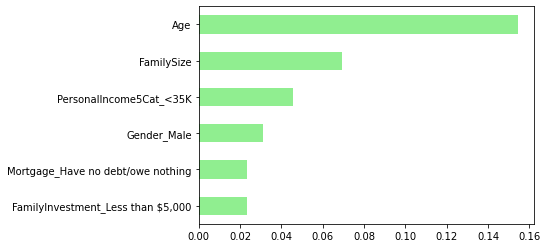

FamilyInvestment_Less than $5,000    0.023141
Mortgage_Have no debt/owe nothing    0.023148
Gender_Male                          0.031099
PersonalIncome5Cat_<35K              0.045739
FamilySize                           0.069564
Age                                  0.154276
dtype: float64

In [ ]:
importances_rf = pd.Series(rf.feature_importances_, index = X.columns)
sorted_importances_rf = importances_rf.sort_values()
sorted_importances_rf[sorted_importances_rf>0.02].plot(kind='barh', color='lightgreen'); plt.show()
sorted_importances_rf[sorted_importances_rf>0.02]

Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=5, random_state= 2)
dt.fit(X_train, y_train)
pred_dt = dt.predict(X_test)
print(classification_report(y_test, pred_dt))
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val = cross_val_score(estimator=dt,X=X, y=y, cv=10)
print(cross_val.mean())
print(dt.score(X_test, y_test))

Logistic Regression


In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train) 
pred_lr = lr.predict(X_test)
print(classification_report(y_test, pred_lr))
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val = cross_val_score(estimator=lr,X=X, y=y, cv=10)
print(cross_val.mean())
print(lr.score(X_test, y_test))

Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(X_train, y_train)
pred_mnb = mnb.predict(X_test)
print(classification_report(y_test, pred_mnb))
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val = cross_val_score(estimator=mnb,X=X, y=y, cv=10)
print(cross_val.mean())
print(mnb.score(X_test, y_test))

SVM

In [ ]:
from sklearn.svm import SVC

svm = SVC(gamma=0.01, C=10, kernel='rbf')
svm.fit(X_train, y_train)
pred_svm = svm.predict(X_test)
print(classification_report(y_test, pred_svm))
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val = cross_val_score(estimator=svm,X=X, y=y, cv=10)
print(cross_val.mean())
print(svm.score(X_test, y_test))

Gradient Booting


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)

gbc.fit(X_train, y_train)
pred_gbc = gbc.predict(X_test)
print(classification_report(y_test, pred_gbc))
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val = cross_val_score(estimator=gbc,X=X, y=y, cv=10)
print(cross_val.mean())
print(gbc.score(X_test, y_test))

XGBoost

In [ ]:
import xgboost as xgb
import re
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
X_train.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_train.columns.values]
X_test.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_test.columns.values]

xg_cl = xgb.XGBClassifier(objective='binary:logistic', n_estimators=10, seed=123)
xg_cl.fit(X_train, y_train)

preds = xg_cl.predict(X_test) 
accuracy = float(np.sum(preds==y_test))/y_test.shape[0] 
print(classification_report(y_test, preds))
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val = cross_val_score(estimator=gbc,X=X, y=y, cv=10)
print(cross_val.mean())
print("accuracy: %f" % (accuracy))

Ensemble model


In [ ]:
from sklearn.ensemble import VotingClassifier

classifiers = [('Logistic Regression', lr), ('K Nearest Neighbours', Knn),('Decision Tree', dt), ('Random Forest', rf), ('SVM', svm), ('MultinomialNB', mnb)]

for clf_name, clf in classifiers: 
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print('{:s} : {:.3f}'.format(clf_name, accuracy_score(y_test, y_pred)))

vc = VotingClassifier(estimators=classifiers)
vc.fit(X_train, y_train)
pred_vc = vc.predict(X_test)
print(classification_report(y_test, pred_vc))
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val = cross_val_score(estimator=gbc,X=X, y=y, cv=10)
print(cross_val.mean())
print(vc.score(X_test, y_test))


Model tuning


In [ ]:
model_params = {
    'svm': {
        'model': SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10,15,20,25,30,35,40,45,50]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    }
}

scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X, y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df


In [ ]:
#another try or feature tuning 


#Exploratory data analysis

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


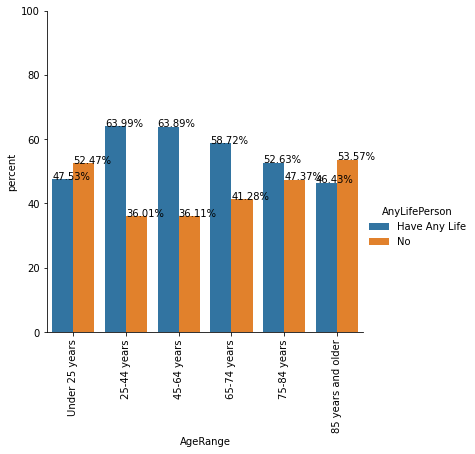

In [ ]:
#Age 
bins = [0, 24, 44, 64, 74, 84, np.inf]
names = ['Under 25 years', '25-44 years', '45-64 years', '65-74 years', '75-84 years', '85 years and older']
df2['AgeRange'] = pd.cut(df2['Age'], bins, labels=names)

pct = df2.groupby('AgeRange')['AnyLifePerson'].value_counts(normalize=True).mul(100).rename('percent').reset_index()
g = sns.catplot(x='AgeRange', y='percent',hue= 'AnyLifePerson', kind='bar', data=pct, hue_order = ['Have Any Life','No'])
g.ax.set_ylim(0,100)
plt.xticks(rotation=90)

for p in g.ax.patches:
  txt = str(p.get_height().round(2))+'%'
  txt_x = p.get_x()
  txt_y = p.get_height()
  g.ax.text(txt_x,txt_y,txt)


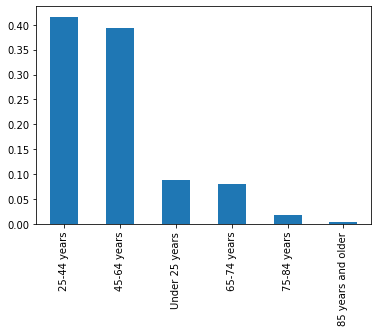

In [ ]:
g = df2[df2['AnyLifePerson']=='Have Any Life']['AgeRange'].value_counts(normalize=True)
g.plot(kind='bar')

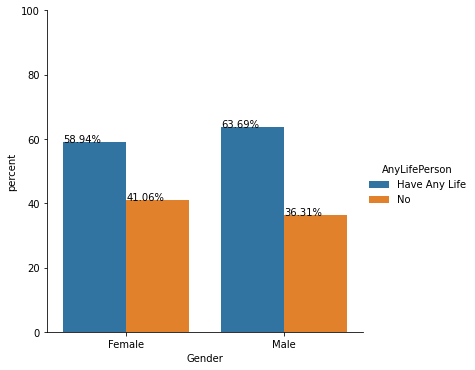

In [ ]:
#Gender
pct = df2.groupby('Gender')['AnyLifePerson'].value_counts(normalize=True).mul(100).rename('percent').reset_index()
g = sns.catplot(x='Gender', y='percent',hue= 'AnyLifePerson', kind='bar', data=pct, hue_order = ['Have Any Life','No'])
g.ax.set_ylim(0,100)

for p in g.ax.patches:
  txt = str(p.get_height().round(2))+'%'
  txt_x = p.get_x()
  txt_y = p.get_height()
  g.ax.text(txt_x,txt_y,txt)



In [ ]:
df2[['Gender','AnyLifePerson']].value_counts()

Gender  AnyLifePerson
Male    Have Any Life    2300
Female  Have Any Life    2130
        No               1484
Male    No               1311
dtype: int64

In [ ]:
(2300/(2300+1311))/(2130/(2130+1484))

1.0807093089321491

In [ ]:
len(df2[df2['AnyLifePerson']=='Have Any Life'])

4430

In [ ]:
len(df2)

7225

In [ ]:
4430/7225

0.6131487889273356

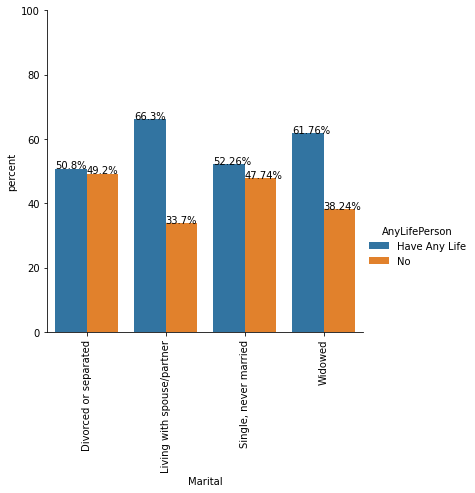

In [ ]:
#Marital
pct = df2.groupby('Marital')['AnyLifePerson'].value_counts(normalize=True).mul(100).rename('percent').reset_index()
g = sns.catplot(x='Marital', y='percent',hue= 'AnyLifePerson', kind='bar', data=pct, hue_order = ['Have Any Life','No'])
g.ax.set_ylim(0,100)
plt.xticks(rotation=90)

for p in g.ax.patches:
  txt = str(p.get_height().round(2))+'%'
  txt_x = p.get_x()
  txt_y = p.get_height()
  g.ax.text(txt_x,txt_y,txt)



In [ ]:
mapping ={'Widowed':"Single", 'Divorced or separated':"Single",'Single, never married':"Single"}
df2['q91']=df2['Marital'].replace(mapping)
df2['q91'].value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Living with spouse/partner    4623
Single                        2602
Name: q91, dtype: int64

In [ ]:
df2[['q91','AnyLifePerson']].value_counts()

q91                         AnyLifePerson
Living with spouse/partner  Have Any Life    3065
                            No               1558
Single                      Have Any Life    1365
                            No               1237
dtype: int64

In [ ]:
# married /signle  -- df2
(3065/(3065+1558))/(1365/(1365+1237))

1.2638083669881204

<Figure size 1440x288 with 0 Axes>

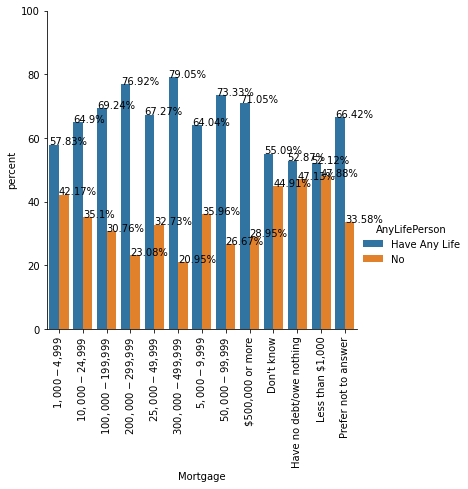

In [ ]:
#Mortgage
plt.figure(figsize=(20,4))
pct = df2.groupby('Mortgage')['AnyLifePerson'].value_counts(normalize=True).mul(100).rename('percent').reset_index()
g = sns.catplot(x='Mortgage', y='percent',hue= 'AnyLifePerson', kind='bar', data=pct, hue_order = ['Have Any Life','No'])
g.ax.set_ylim(0,100)
plt.xticks(rotation=90)

for p in g.ax.patches:
  txt = str(p.get_height().round(2))+'%'
  txt_x = p.get_x()
  txt_y = p.get_height()
  g.ax.text(txt_x,txt_y,txt)


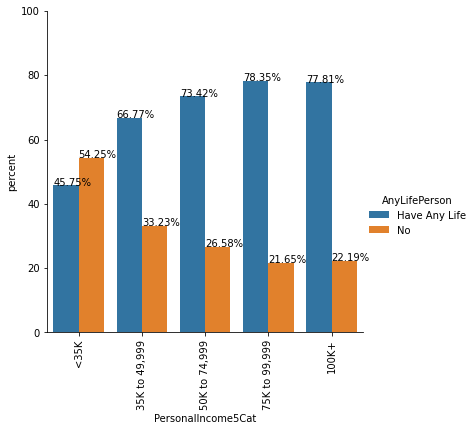

In [ ]:
#PersonalIncomeTerm
orders = ['<35K', '35K to 49,999', '50K to 74,999', '75K to 99,999', '100K+']
pct = df2.groupby('PersonalIncome5Cat')['AnyLifePerson'].value_counts(normalize=True).mul(100).rename('percent').reset_index()
g = sns.catplot(x='PersonalIncome5Cat', y='percent',hue= 'AnyLifePerson', kind='bar', data=pct, order = orders, hue_order = ['Have Any Life','No'])
g.ax.set_ylim(0,100)
plt.xticks(rotation=90)

for p in g.ax.patches:
  txt = str(p.get_height().round(2))+'%'
  txt_x = p.get_x()
  txt_y = p.get_height()
  g.ax.text(txt_x,txt_y,txt)

In [ ]:
df['qd5'].unique()

array(['$75,000 - $99,999', '$25,000 - $34,999', '$35,000 - $49,999',
       "Don't know", '$125,000 - $149,999', '$200,000 or more',
       '$100,000 - $124,999', 'Less than $15,000', '$150,000 - $199,999',
       '$50,000 - $74,999', '$15,000 - $24,999', 'unknown'], dtype=object)

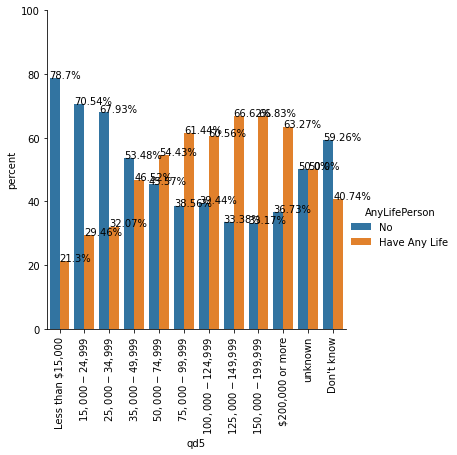

In [ ]:
#PersonalIncomeTerm
orders = ['Less than $15,000', '$15,000 - $24,999', '$25,000 - $34,999', '$35,000 - $49,999',  
        '$50,000 - $74,999', '$75,000 - $99,999', '$100,000 - $124,999',
        '$125,000 - $149,999', '$150,000 - $199,999', '$200,000 or more',
         'unknown', "Don't know"]
pct = df.groupby('qd5')['AnyLifePerson'].value_counts(normalize=True).mul(100).rename('percent').reset_index()
g = sns.catplot(x='qd5', y='percent',hue= 'AnyLifePerson', kind='bar', data=pct, order = orders, hue_order = ['No', 'Have Any Life'])
g.ax.set_ylim(0,100)
plt.xticks(rotation=90)

for p in g.ax.patches:
  txt = str(p.get_height().round(2))+'%'
  txt_x = p.get_x()
  txt_y = p.get_height()
  g.ax.text(txt_x,txt_y,txt)

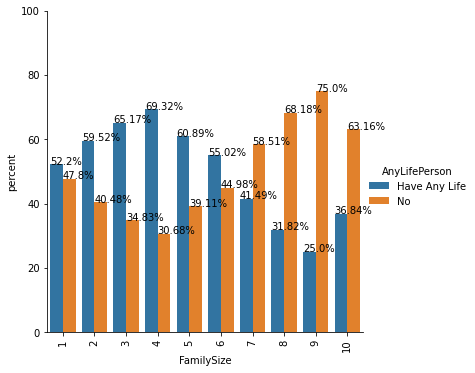

In [ ]:
#family size
pct = df2.groupby('FamilySize')['AnyLifePerson'].value_counts(normalize=True).mul(100).rename('percent').reset_index()
order = sorted(df2['FamilySize'].unique())
g = sns.catplot(x='FamilySize', y='percent',hue= 'AnyLifePerson', kind='bar', data=pct, hue_order = ['Have Any Life','No'], order=order)
g.ax.set_ylim(0,100)
plt.xticks(rotation=90)

for p in g.ax.patches:
  txt = str(p.get_height().round(2))+'%'
  txt_x = p.get_x()
  txt_y = p.get_height()
  g.ax.text(txt_x,txt_y,txt)

In [ ]:
df2['FamilyInvestment'].unique()

array(['$500,000 - $749,999', '$10,000 - $24,999', 'Less than $5,000',
       '$100,000 - $249,999', '$1,000,000 - $2,499,999',
       '$25,000 - $49,999', '$5,000 - $9,999', '$2,500,000 - $4,999,999',
       '$250,000 - $499,999', '$50,000 - $99,999', '$750,000 - $999,999',
       "Don't know", '$5,000,000 or more'], dtype=object)

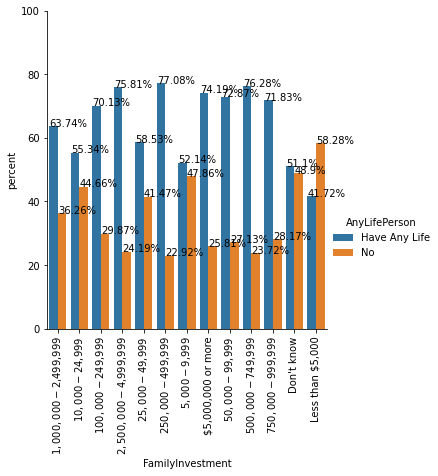

In [ ]:
#family invest
pct = df2.groupby('FamilyInvestment')['AnyLifePerson'].value_counts(normalize=True).mul(100).rename('percent').reset_index()
#order = sorted(df2['FamilySize'].unique())
g = sns.catplot(x='FamilyInvestment', y='percent',hue= 'AnyLifePerson', kind='bar', data=pct, hue_order = ['Have Any Life','No'])
g.ax.set_ylim(0,100)
plt.xticks(rotation=90)

for p in g.ax.patches:
  txt = str(p.get_height().round(2))+'%'
  txt_x = p.get_x()
  txt_y = p.get_height()
  g.ax.text(txt_x,txt_y,txt)


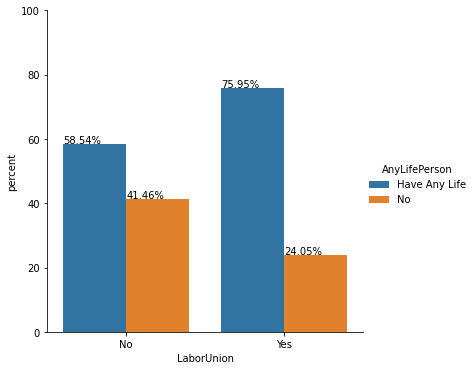

In [ ]:
#labor union , Group insurance??? 
pct = df2.groupby('LaborUnion')['AnyLifePerson'].value_counts(normalize=True).mul(100).rename('percent').reset_index()
g = sns.catplot(x='LaborUnion', y='percent',hue= 'AnyLifePerson', kind='bar', data=pct, hue_order = ['Have Any Life','No'])
g.ax.set_ylim(0,100)


for p in g.ax.patches:
  txt = str(p.get_height().round(2))+'%'
  txt_x = p.get_x()
  txt_y = p.get_height()
  g.ax.text(txt_x,txt_y,txt)

In [ ]:
print(df[['qd1','AnyGroupPerson']].value_counts())
print(df[['qd1','AnyLifePerson']].value_counts())
print(df[['qd1','AnyIndividualPerson']].value_counts())

qd1  AnyGroupPerson
No   No                6557
     Have Group        2697
Yes  Have Group         981
     No                 815
dtype: int64
qd1  AnyLifePerson
No   Have Any Life    4677
     No               4577
Yes  Have Any Life    1196
     No                600
dtype: int64
qd1  AnyIndividualPerson
No   No                     6443
     Have Individual        2811
Yes  No                     1135
     Have Individual         661
dtype: int64


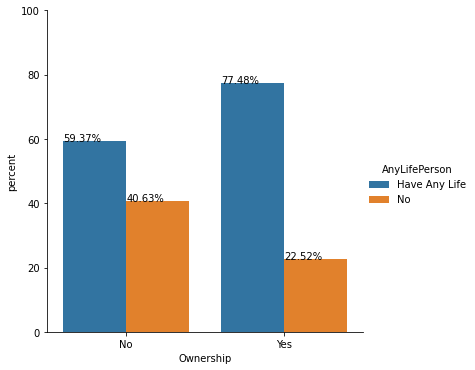

In [ ]:
#ownsership  #  individual or group 

pct = df2.groupby('Ownership')['AnyLifePerson'].value_counts(normalize=True).mul(100).rename('percent').reset_index()
g = sns.catplot(x='Ownership', y='percent',hue= 'AnyLifePerson', kind='bar', data=pct, hue_order = ['Have Any Life','No'])
g.ax.set_ylim(0,100)


for p in g.ax.patches:
  txt = str(p.get_height().round(2))+'%'
  txt_x = p.get_x()
  txt_y = p.get_height()
  g.ax.text(txt_x,txt_y,txt)

In [ ]:
df2['FamilyIncome'].value_counts(normalize=True)

$50,000 - $74,999      0.207889
$75,000 - $99,999      0.195156
$35,000 - $49,999      0.168443
$100,000 - $124,999    0.107405
$25,000 - $34,999      0.065052
$125,000 - $149,999    0.063114
$150,000 - $199,999    0.059239
$200,000 or more       0.050519
$15,000 - $24,999      0.042353
Less than $15,000      0.037924
Don't know             0.002907
Name: FamilyIncome, dtype: float64

In [ ]:
df[['AnyIndividualPerson','AnyPerm', 'AnyTerm']].value_counts()

AnyIndividualPerson  AnyPerm   AnyTerm 
No                   No        No          7578
Have Individual      No        Has Term    1571
                     Has Perm  No          1407
                     No        No           277
                     Has Perm  Has Term     217
dtype: int64

In [ ]:
df[['AnyLifePerson','AnyPerm', 'AnyTerm']].value_counts()

AnyLifePerson  AnyPerm   AnyTerm 
No             No        No          5177
Have Any Life  No        No          2678
                         Has Term    1571
               Has Perm  No          1407
                         Has Term     217
dtype: int64

In [ ]:
df[['AnyGroupPerson','AnyPerm', 'AnyTerm']].value_counts()

AnyGroupPerson  AnyPerm   AnyTerm 
No              No        No          5462
Have Group      No        No          2393
No              Has Perm  No           906
                No        Has Term     894
Have Group      No        Has Term     677
                Has Perm  No           501
No              Has Perm  Has Term     110
Have Group      Has Perm  Has Term     107
dtype: int64

In [ ]:
df[['AnyLifePerson', 'MultiCovPerson1']].value_counts()

AnyLifePerson  MultiCovPerson1
Have Any Life  Group only         2320
               Individual only    2114
               Both               1358
dtype: int64

In [ ]:
df1[(df1['AnyGroupPerson']=='Have Group')&(df1['AnyIndividualPerson']=='Have Individual')].shape[0]/df1[df1['AnyLifePerson']=='Have Any Life'].shape[0]


0.24311512415349887

In [ ]:
df['AnyLifePerson'].value_counts()

Have Any Life    5873
No               5177
Name: AnyLifePerson, dtype: int64

In [ ]:
df[df['Q13']=='Unknown']

,respid,qd5,q8,q9,PresenceOfSpousePartner,Q12,Q13,Q14,q24,q25,q32,q33,FTF_AMT,PersonalIncome5Cat,AnyLifePerson,MultiCovPerson1,AnyGroupPerson,AnyIndividualPerson,TypeInd,OnlySGLI,TotalSGLI,HusbandWife,Singles,TotalInd_Win,TotalGrp_Win,TotalLife_Win,MidPtCalcPerson,YearsReplacement_Win,AnyTerm,AnyPerm,TermPermPerson,qd8,STATE,q4,q5,q6,qd1,qd2,qd3,qd4a,qd4c,qd6,qd7a
401,198,"$75,000 - $99,999",4,Living with spouse/partner,Spouse/Partner,Female,Unknown,Child,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,No,No,NaN,NaN,NaN,NaN,Single Women,NaN,NaN,NaN,NaN,NaN,No,No,NaN,NaN,FL,Would be able to cover living expenses well in...,Would be able to cover living expenses well in...,Have significant savings and/or income to be a...,No,NaN,No,Employed full-time,500  999,"$50,000 - $99,999","$10,000 - $24,999"
6060,2979,"$100,000 - $124,999",4,Living with spouse/partner,Spouse/Partner,Male,Unknown,Husband/partner,YES,1.0,NO,NaN,NaN,NaN,Have Any Life,Both,Have Group,Have Individual,Term only,NaN,NaN,Husband / Partner,NaN,NaN,NaN,NaN,NaN,NaN,Has Term,No,Term only,NaN,GA,Would be able to cover living expenses for sev...,Would immediately have trouble meeting everyda...,Would be able to cover the cost of professiona...,Yes,Yes,Yes,Employed full-time,100  499,"$50,000 - $99,999","$100,000 - $199,999"


In [ ]:
df3 = df[~(df['Q13']=='Unknown')]

In [ ]:
df3['Q13'] = df3['Q13'].astype('int')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df3[(df3['AnyLifePerson']=='Have Any Life')&(df3['Q13']==0)]

,respid,qd5,q8,q9,PresenceOfSpousePartner,Q12,Q13,Q14,q24,q25,q32,q33,FTF_AMT,PersonalIncome5Cat,AnyLifePerson,MultiCovPerson1,AnyGroupPerson,AnyIndividualPerson,TypeInd,OnlySGLI,TotalSGLI,HusbandWife,Singles,TotalInd_Win,TotalGrp_Win,TotalLife_Win,MidPtCalcPerson,YearsReplacement_Win,AnyTerm,AnyPerm,TermPermPerson,qd8,STATE,q4,q5,q6,qd1,qd2,qd3,qd4a,qd4c,qd6,qd7a
355,180,"$125,000 - $149,999",3,Living with spouse/partner,Spouse/Partner,Female,0,Child,NaN,NaN,NaN,NaN,NaN,NaN,Have Any Life,Group only,Have Group,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No,NaN,NaN,MA,Would be able to cover living expenses for sev...,Would have difficulty covering living expenses...,Would be able to cover the cost of professiona...,No,NaN,No,Employed full-time,500  999,Don't know,Don't know
761,368,"$35,000 - $49,999",4,Living with spouse/partner,Spouse/Partner,Female,0,Child,YES,1.0,NaN,NaN,NaN,NaN,Have Any Life,Both,Have Group,Have Individual,Perm only,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Has Perm,Perm only,NaN,OH,Would be able to cover living expenses well in...,Would have difficulty covering living expenses...,Would immediately struggle to cover the cost o...,No,NaN,No,Employed full-time,Dont know,Don't know,"$5,000 - $9,999"
918,447,"$75,000 - $99,999",3,Living with spouse/partner,Spouse/Partner,Female,0,Child,NO,NaN,NaN,NaN,NaN,NaN,Have Any Life,Group only,Have Group,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No,NaN,NaN,NY,Would be able to cover living expenses for sev...,Would be able to cover living expenses well in...,Would be able to cover the cost of professiona...,No,NaN,No,Not employed,NaN,"$25,000 - $49,999","$5,000 - $9,999"
1157,567,"$75,000 - $99,999",4,Living with spouse/partner,Spouse/Partner,Male,0,Child,YES,1.0,NaN,NaN,NaN,NaN,Have Any Life,Individual only,No,Have Individual,Perm only,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Has Perm,Perm only,NaN,ME,Would be able to cover living expenses for sev...,Would have difficulty covering living expenses...,Have significant savings and/or income to be a...,No,NaN,No,Employed full-time,20  99,Don't know,Prefer not to answer
1624,788,"Less than $15,000",4,Living with spouse/partner,Spouse/Partner,Male,0,Child,YES,1.0,NO,NaN,NaN,NaN,Have Any Life,Individual only,No,Have Individual,Perm only,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Has Perm,Perm only,NaN,PA,Would be able to cover living expenses for sev...,Would have difficulty covering living expenses...,Would immediately struggle to cover the cost o...,No,NaN,No,NaN,NaN,"$5,000 - $9,999",Have no debt/owe nothing
1642,794,"$75,000 - $99,999",5,Living with spouse/partner,Spouse/Partner,Female,0,Child,NO,NaN,NaN,NaN,NaN,NaN,Have Any Life,Group only,Have Group,No,NaN,NaN,NaN,NaN,NaN,NaN,115000.0,115000.0,NaN,NaN,No,No,NaN,NaN,AL,Would immediately have trouble meeting everyda...,Would be able to cover living expenses well in...,Have long-term care insurance and would be abl...,No,NaN,No,Employed full-time,100  499,"$1,000,000 - $2,499,999","Less than $1,000"
1721,835,"$75,000 - $99,999",5,Living with spouse/partner,Spouse/Partner,Female,0,Child,NaN,NaN,NaN,NaN,NaN,NaN,Have Any Life,Group only,Have Group,No,NaN,NaN,NaN,NaN,NaN,NaN,10000.0,10000.0,NaN,NaN,No,No,NaN,NaN,AL,Would be able to cover living expenses for sev...,Would immediately have trouble meeting everyda...,Would immediately struggle to cover the cost o...,Yes,No,No,Employed full-time,100  499,"Less than $5,000","$5,000 - $9,999"
1903,923,"$50,000 - $74,999",6,Living with spouse/partner,Spouse/Partner,Male,0,Child,YES,1.0,NaN,NaN,5000.0,NaN,Have Any Life,Both,Have Group,Have Individual,Perm only,NaN,NaN,NaN,NaN,5000.0,50000.0,55000.0,NaN,NaN,No,Has Perm,Perm only,NaN,WI,Would immediately have trouble meeting everyda...,Would immediately have trouble meeting everyda...,Would be able to cover the cost of professiona...,No,NaN,No,Employed full-time,100  499,"$100,000 - $249,999","$1,000 - $4,999"
2644,1279,"$150,000 - $199,999",6,Living with spouse/partner,Spouse/Partner,F